In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install fastaudio
!pip install fastai==2.5.2
!pip install matplotlib==3.2.2
!pip install scikit-learn==1.0.2

In [ ]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:47: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  '"torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. '


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from imblearn.metrics import specificity_score

In [ ]:
# import os
# import sys
# import subprocess
# import numpy as np
# import glob
# import json
# import pandas as pd

# '''
# This script creates a folder "Extracted_data" inside which it extracts all the wav files in the directories date-wise
# '''

# coswara_data_dir = os.path.abspath('/content/gdrive/MyDrive/thesisDatasets/Coswara/github/') # Local Path of iiscleap/Coswara-Data Repo
# extracted_data_dir = os.path.join('/content/gdrive/MyDrive/thesisDatasets/Coswara/', 'Extracted_data')  

# if not os.path.exists(coswara_data_dir):
#     raise("Check the Coswara dataset directory!")

# if not os.path.exists(extracted_data_dir):
#     os.makedirs(extracted_data_dir) # Creates the Extracted_data folder if it doesn't exist

# dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data_dir))))
# dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_data_dir))))

# dirs_to_extract = list(set(dirs_all) - dirs_extracted)

# for d in dirs_to_extract:
#     p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
#     p.wait()


# print("Extraction process complete!")

# Preprocessing

In [ ]:
COS_loc = "/content/gdrive/MyDrive/Coswara/"
COS_data = "/content/gdrive/MyDrive/Coswara/Extracted_data/"

In [ ]:
cos_df = pd.read_csv('/content/gdrive/MyDrive/Coswara/github/combined_data.csv')
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2233 non-null   object 
 1   a                2233 non-null   int64  
 2   covid_status     2233 non-null   object 
 3   record_date      2233 non-null   object 
 4   ep               2233 non-null   object 
 5   g                2233 non-null   object 
 6   l_c              2233 non-null   object 
 7   l_l              1994 non-null   object 
 8   l_s              2233 non-null   object 
 9   rU               1553 non-null   object 
 10  smoker           573 non-null    object 
 11  cold             291 non-null    object 
 12  ht               183 non-null    object 
 13  diabetes         191 non-null    object 
 14  cough            385 non-null    object 
 15  ctDate           134 non-null    object 
 16  ctScan           450 non-null    object 
 17  ctScore       

In [ ]:
cos_df = cos_df[["id", "covid_status", "test_status", "others_resp", "asthma",  "pneumonia", "cld"]]
cos_df[:5]

,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


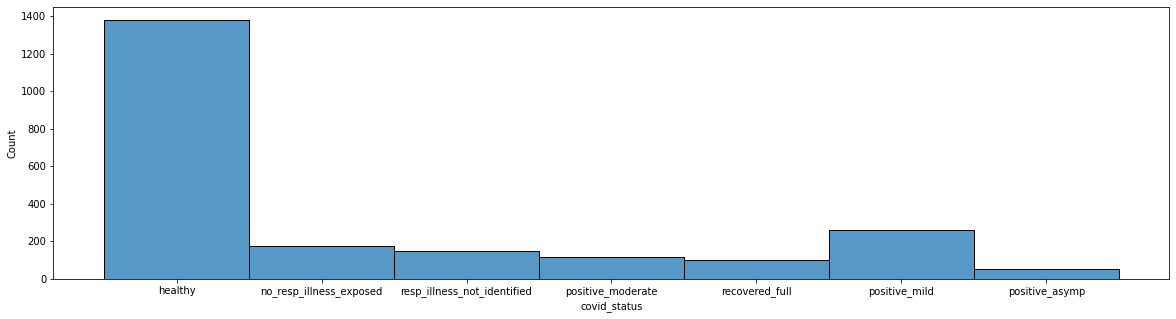

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(cos_df['covid_status'])

In [ ]:
# only covid positive & no respiratory problems samples

cos_covid = cos_df[( (cos_df.covid_status == 'positive_mild') 
                    | (cos_df.covid_status=='positive_asymp')
                    | (cos_df.covid_status =='positive_moderate') ) 
                  ]

#cos_covid.to_csv('cos_covid.csv')

print('SAMPLES: -->',len(cos_covid))
cos_covid.info()
cos_covid[:5]

SAMPLES: --> 430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 28 to 2232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            430 non-null    object
 1   covid_status  430 non-null    object
 2   test_status   335 non-null    object
 3   others_resp   10 non-null     object
 4   asthma        9 non-null      object
 5   pneumonia     12 non-null     object
 6   cld           4 non-null      object
dtypes: object(7)
memory usage: 26.9+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
28,9hXEs9OejdVxG6JJGCyKQpqVvy43,positive_moderate,p,NaN,NaN,NaN,NaN
33,XbOUJCUl8GWEpQpIRMvujDE1sTE2,positive_moderate,p,NaN,NaN,NaN,NaN
34,Qcliznd3z1VdWmJOZh9nvlstTYv1,positive_moderate,p,NaN,NaN,NaN,NaN
36,AutXsDVtEcVH9ZQ58NqDunDcqZv1,positive_mild,p,True,NaN,NaN,NaN
37,dFtGnzYqh1NVAwQUQ3wkysqAe3n1,positive_asymp,p,NaN,NaN,NaN,NaN


In [ ]:
# covid healthy & no respiratory problems samples (1359 + 170)

cos_healthy = cos_df[( (cos_df.covid_status == "healthy") 
                      | (cos_df.covid_status == "no_resp_illness_exposed") )
                    ]

#cos_healthy.to_csv('cos_healthy.csv')

print('SAMPLES: -->',len(cos_healthy))
cos_healthy.info()
cos_healthy[:5]

SAMPLES: --> 1553
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1553 non-null   object
 1   covid_status  1553 non-null   object
 2   test_status   331 non-null    object
 3   others_resp   1 non-null      object
 4   asthma        22 non-null     object
 5   pneumonia     0 non-null      object
 6   cld           1 non-null      object
dtypes: object(7)
memory usage: 97.1+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


In [ ]:
# loads all file paths from location

cos_files = get_files(
  path = COS_data,
  extensions = '.wav',
  recurse = True
)

cos_files

(#19636) [Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-e.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-fast.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-a.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-heavy.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-o.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-shallow.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-normal.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/breathing-deep.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/breathing-shallow.wav'),Path

In [ ]:
# method to get file paths

def getit(id):
    for i in cos_files:
        folders = str(i).split("/")
        if folders[-1] == 'cough-heavy.wav':
            if folders[-2] == id:
                #print(str(i))
                return str(i)

getit(cos_covid.id.values[0]) 

'/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav'

In [ ]:
# save every audio files and the corresponding label in list

file_names = []
labels = []

for i in cos_covid.id.values:
    file_names.append(getit(i))
    labels.append('COVID POSITIVE')

for i in cos_healthy.id.values:
    file_names.append(getit(i))
    labels.append('COVID NEGATIVE')
    
print(file_names[:3])
print(labels[:3])

Counter(labels)

['/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav', '/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav', '/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav']
['COVID POSITIVE', 'COVID POSITIVE', 'COVID POSITIVE']


Counter({'COVID NEGATIVE': 1553, 'COVID POSITIVE': 430})

In [ ]:
# dataframe for dataloader

df = pd.DataFrame({'filename' : file_names, 'category': labels})
three_df = df.copy()
three_df

In [ ]:
# # check audio files samplerate

# sr_list = []

# for i in three_df.filename.values:
#     sr_list.append(librosa.get_samplerate(i))
    
# sr_list = np.array(sr_list)

# values, counts = np.unique(sr_list, return_counts=True)
# print(values, counts)

# # check duration of each files

# dur_list = []
# failed_list = []
# for i in three_df.filename.values:
#     try:
#         y, sr = librosa.load(i)
#         dur_list.append(librosa.get_duration(y=y, sr=sr))
#     except:
#         failed_list.append(i)
#         pass
    
# dur_list = np.array(dur_list)

# print(np.mean(dur_list))
# print(np.average(dur_list))

# # files failed to load
# print(failed_list[:3])
# len(failed_list)

# # remove corrupted files
# for i in failed_list:
#     print(i)
#     three_df.drop(three_df[three_df.filename == i].index, inplace=True)
# three_df

In [ ]:
three_df = three_df.dropna()

COVID NEGATIVE    1527
COVID POSITIVE     418
Name: category, dtype: int64

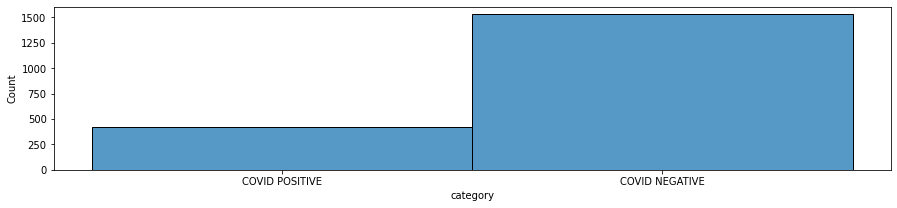

In [ ]:
# check class distribution
plt.figure(figsize=(15,3))
sns.histplot(three_df['category'])

three_df['category'].value_counts()

In [ ]:
three_df.to_csv(COS_data+'coswara_df_2class.csv', index=False) 

# MFCC

In [ ]:
crop6s = ResizeSignal(duration=6000)
aud2mfcc = AudioToMFCC(sample_rate=22050, n_mfcc=40, log_mels=False, 
                       melkwargs={'n_fft':2048, 'hop_length':256,'n_mels':128})

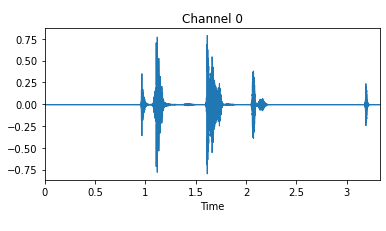

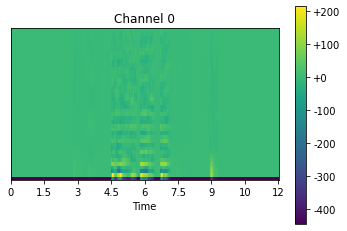

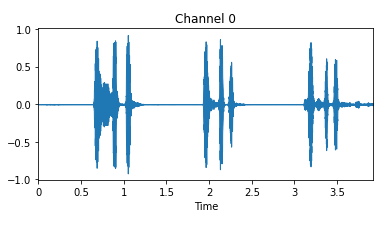

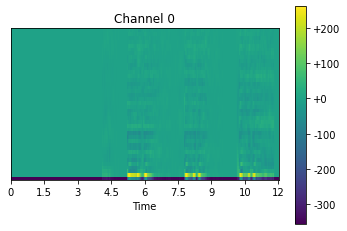

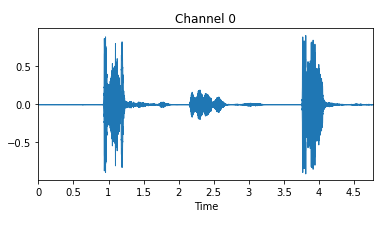

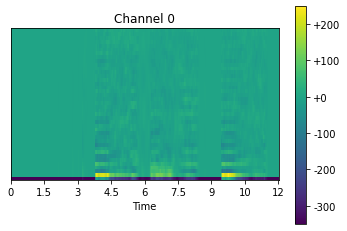

In [ ]:
# check transformations
pipe = Pipeline([AudioTensor.create, crop6s, aud2mfcc])

for fn in three_df.filename.values[42:45]:
      audio = AudioTensor.create(fn)
      audio.show()
      pipe(fn).show()

## Dataloader

In [ ]:
three_df, three_df_test = train_test_split(three_df, test_size=0.15, random_state=69, stratify=three_df.category.values)

In [ ]:
print(three_df.category.value_counts())
print(three_df_test.category.value_counts())

COVID NEGATIVE    1298
COVID POSITIVE     355
Name: category, dtype: int64
COVID NEGATIVE    229
COVID POSITIVE     63
Name: category, dtype: int64


Setting-up type transforms pipelines
1524  /content/gdrive/MyDrive/Coswara/Extracted_data/20200416/KOKCooQejva2hnY3f1LnxqL4gUR2/cough-heavy.wav  COVID NEGATIVE
863   /content/gdrive/MyDrive/Coswara/Extracted_data/20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/cough-heavy.wav  COVID NEGATIVE
769   /content/gdrive/MyDrive/Coswara/Extracted_data/20200417/Pjs0FDjZUofs8mvB3cjg0Hibe8B2/cough-heavy.wav  COVID NEGATIVE
1911  /content/gdrive/MyDrive/Coswara/Extracted_data/20210426/woCTR97MfJMTanmngUpcK1IJsvm1/cough-heavy.wav  COVID NEGATIVE
1520  /content/gdrive/MyDrive/Coswara/Extracted_data/20200416/A6cnzNlOAmM8GCpUKtC1ZwTKUiO2/cough-heavy.wav  COVID NEGATIVE
...                                                                                                    ...             ...
84    /content/gdrive/MyDrive/Coswara/Extracted_data/20200820/9Wkd6QJdpBNEosMpzYhFwZjBJX92/cough-heavy.wav  COVID POSITIVE
1801  /content/gdrive/MyDrive/Coswara/Extracted_data/20200814/38kz9bimrcUUgifY8S27MVR89eN2/cough-heavy

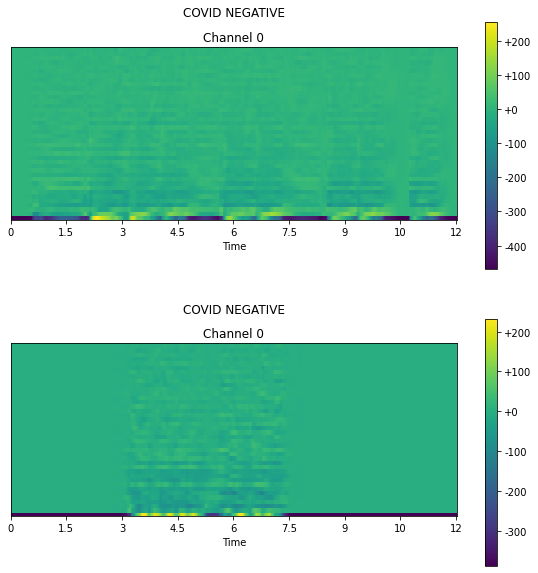

In [ ]:
item_tfms = [crop6s, aud2mfcc]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_x = ColReader("filename"),
                 splitter = TrainTestSplitter(test_size=0.15, random_state=69, 
                                              stratify=three_df.category.values),
                 item_tfms = item_tfms,
                 get_y = ColReader("category"))


auds.summary(three_df, show_batch=True, figsize=(10, 10))

## Check data distribution

In [ ]:
dls = auds.dataloaders(three_df, bs=32)

for i in range(10):
    x,y = dls.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())

(array([0, 1]), array([23,  9]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([25,  7]))
(array([0, 1]), array([27,  5]))
(array([0, 1]), array([18, 14]))
(array([0, 1]), array([25,  7]))
(array([0, 1]), array([23,  9]))
(array([0, 1]), array([22, 10]))
(array([0, 1]), array([25,  7]))
COVID NEGATIVE    1103
COVID POSITIVE     302
Name: category, dtype: int64
COVID NEGATIVE    195
COVID POSITIVE     53
Name: category, dtype: int64


In [ ]:
test_dl = dls.test_dl(three_df_test, with_labels=True)

In [ ]:
print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())
print(test_dl.items.category.value_counts())

# Models: Fine-tuning

### ResNet-18

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.105520,0.979355,0.657258,0.650701,01:08


Better model found at epoch 0 with accuracy value: 0.6572580933570862.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.817774,0.702152,0.681452,0.595162,00:35
1,0.670109,0.623806,0.725806,0.687325,00:35
2,0.609190,0.586542,0.758065,0.724045,00:35
3,0.549509,0.534231,0.758065,0.748863,00:36
4,0.481737,0.588290,0.758065,0.716642,00:36
5,0.456483,0.521176,0.782258,0.768070,00:37
6,0.411511,0.523543,0.810484,0.738703,00:37
7,0.367505,0.639167,0.782258,0.719448,00:35
8,0.321553,0.646176,0.794355,0.754330,00:35
9,0.305954,0.684626,0.814516,0.735123,00:35


Better model found at epoch 0 with accuracy value: 0.6814516186714172.
Better model found at epoch 1 with accuracy value: 0.725806474685669.
Better model found at epoch 2 with accuracy value: 0.7580645084381104.
Better model found at epoch 5 with accuracy value: 0.7822580933570862.
Better model found at epoch 6 with accuracy value: 0.8104838728904724.
Better model found at epoch 9 with accuracy value: 0.8145161271095276.
Better model found at epoch 10 with accuracy value: 0.8266128897666931.
Better model found at epoch 21 with accuracy value: 0.8346773982048035.
Better model found at epoch 24 with accuracy value: 0.8387096524238586.
Better model found at epoch 25 with accuracy value: 0.8467742204666138.
Better model found at epoch 30 with accuracy value: 0.850806474685669.
Better model found at epoch 37 with accuracy value: 0.8669354915618896.


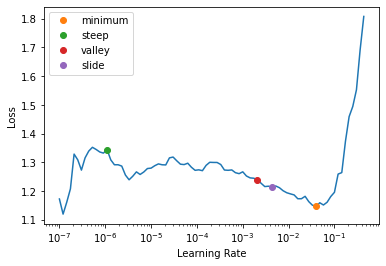

In [ ]:
# resnet 18 model
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

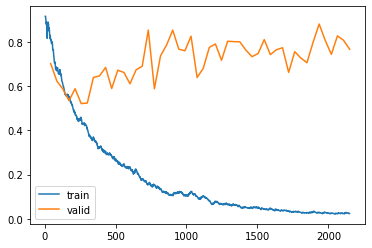

In [ ]:
learn.recorder.plot_loss()

0.8321917808219178 0.7772925764192139 0.715518441196938 0.6916545366327025 0.6916545366327025 0.7633333333333333
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       229
           1       0.67      0.44      0.53        63

    accuracy                           0.83       292
   macro avg       0.76      0.69      0.72       292
weighted avg       0.82      0.83      0.82       292



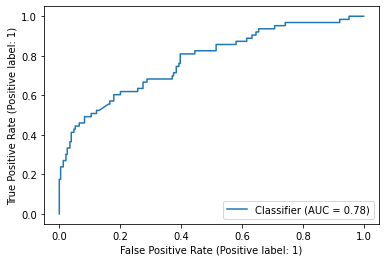

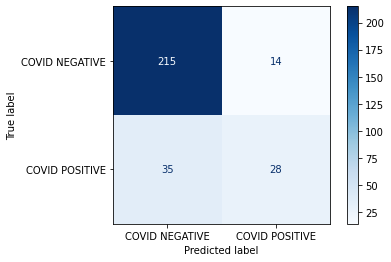

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.194325,0.766291,0.625000,0.694001,00:36


Better model found at epoch 0 with accuracy value: 0.625.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.051708,0.784242,0.612903,0.638171,00:37
1,0.989574,0.790714,0.588710,0.655104,00:36
2,0.912639,0.607497,0.689516,0.707934,00:36
3,0.838072,0.662116,0.677419,0.618723,00:36
4,0.787081,0.625088,0.681452,0.726512,00:36
5,0.735453,0.639676,0.709677,0.656652,00:35
6,0.697685,0.591991,0.721774,0.693033,00:35
7,0.653338,0.614646,0.709677,0.703919,00:35
8,0.567518,0.576257,0.745968,0.709289,00:35
9,0.537451,0.601677,0.750000,0.687034,00:35


Better model found at epoch 0 with accuracy value: 0.6129032373428345.
Better model found at epoch 2 with accuracy value: 0.6895161271095276.
Better model found at epoch 5 with accuracy value: 0.7096773982048035.
Better model found at epoch 6 with accuracy value: 0.7217742204666138.
Better model found at epoch 8 with accuracy value: 0.7459677457809448.
Better model found at epoch 9 with accuracy value: 0.75.
Better model found at epoch 10 with accuracy value: 0.7701612710952759.
Better model found at epoch 13 with accuracy value: 0.7822580933570862.
Better model found at epoch 14 with accuracy value: 0.7943548560142517.
Better model found at epoch 19 with accuracy value: 0.8266128897666931.
Better model found at epoch 34 with accuracy value: 0.8427419066429138.


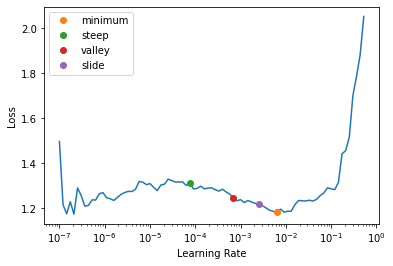

In [ ]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

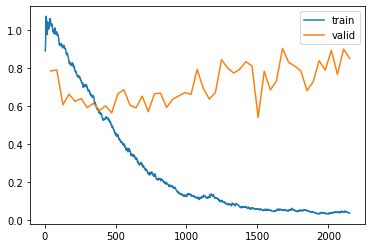

In [ ]:
learn.recorder.plot_loss()

0.7945205479452054 0.7745546544673182 0.6928471248246844 0.6906494766756776 0.6906494766756776 0.6951955148676461
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       229
           1       0.52      0.51      0.52        63

    accuracy                           0.79       292
   macro avg       0.70      0.69      0.69       292
weighted avg       0.79      0.79      0.79       292



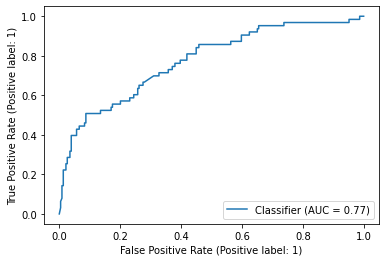

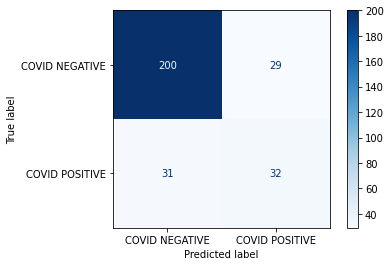

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-50

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.190772,0.994626,0.673387,0.634785,00:47


Better model found at epoch 0 with accuracy value: 0.6733871102333069.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.678954,0.605082,0.774194,0.649589,00:46
1,0.541185,0.582627,0.774194,0.741848,00:45
2,0.423598,0.425940,0.826613,0.793614,00:45
3,0.367042,0.510203,0.806452,0.739381,00:43
4,0.336446,0.472177,0.842742,0.788776,00:44
5,0.347183,0.513444,0.818548,0.752540,00:44
6,0.346892,0.694905,0.818548,0.757862,00:43
7,0.353203,0.568394,0.818548,0.765022,00:44
8,0.342149,0.642131,0.782258,0.735704,00:44
9,0.347795,1.012850,0.814516,0.731737,00:44


Better model found at epoch 0 with accuracy value: 0.774193525314331.
Better model found at epoch 2 with accuracy value: 0.8266128897666931.
Better model found at epoch 4 with accuracy value: 0.8427419066429138.
Better model found at epoch 31 with accuracy value: 0.8548387289047241.
Better model found at epoch 34 with accuracy value: 0.8588709831237793.


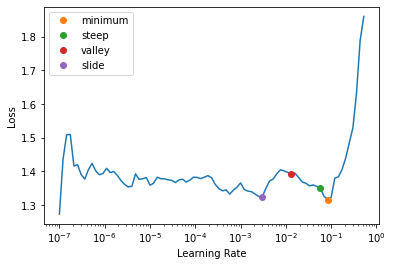

In [ ]:
learn = cnn_learner(dls, resnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

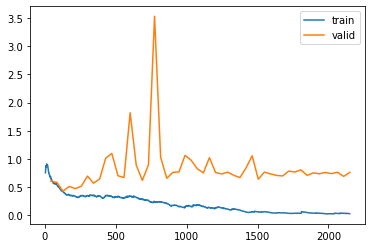

In [ ]:
learn.recorder.plot_loss()

0.797945205479452 0.7657170582934776 0.6624542016889046 0.6468080682054481 0.6468080682054481 0.6940982404692082
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       229
           1       0.55      0.38      0.45        63

    accuracy                           0.80       292
   macro avg       0.69      0.65      0.66       292
weighted avg       0.78      0.80      0.78       292



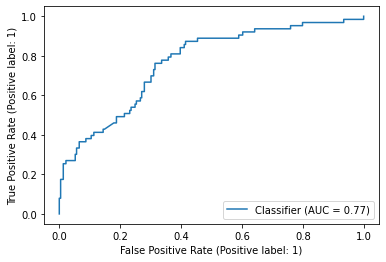

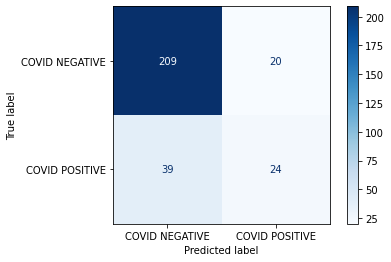

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-101

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.172028,0.821613,0.596774,0.628495,00:45


Better model found at epoch 0 with accuracy value: 0.5967742204666138.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.077245,0.814579,0.576613,0.582051,00:47
1,1.069628,0.733053,0.612903,0.637881,00:47
2,1.012042,0.744492,0.580645,0.647944,00:47
3,1.019304,0.640078,0.701613,0.716255,00:47
4,0.981277,0.644970,0.693548,0.710256,00:48
5,0.936251,0.707173,0.637097,0.677358,00:48
6,0.893915,0.669895,0.633065,0.667779,00:48
7,0.851367,0.640794,0.685484,0.694727,00:48
8,0.842060,0.649665,0.693548,0.690808,00:49
9,0.815919,0.721910,0.705645,0.682632,00:47


Better model found at epoch 0 with accuracy value: 0.5766128897666931.
Better model found at epoch 1 with accuracy value: 0.6129032373428345.
Better model found at epoch 3 with accuracy value: 0.7016128897666931.
Better model found at epoch 9 with accuracy value: 0.7056451439857483.
Better model found at epoch 10 with accuracy value: 0.7137096524238586.
Better model found at epoch 11 with accuracy value: 0.7701612710952759.
Better model found at epoch 21 with accuracy value: 0.774193525314331.
Better model found at epoch 22 with accuracy value: 0.7903226017951965.
Better model found at epoch 23 with accuracy value: 0.8064516186714172.
Better model found at epoch 29 with accuracy value: 0.8185483813285828.
Better model found at epoch 41 with accuracy value: 0.8225806355476379.
Better model found at epoch 42 with accuracy value: 0.8266128897666931.


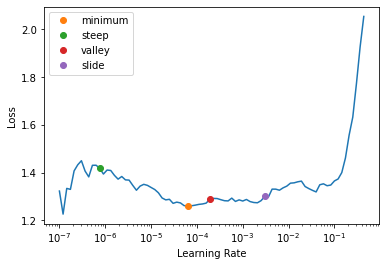

In [ ]:
learn = cnn_learner(dls, resnet101, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

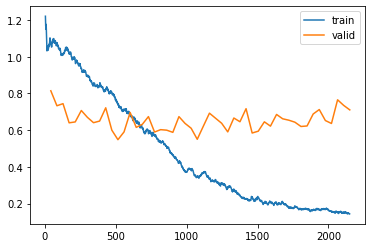

In [ ]:
learn.recorder.plot_loss()

0.8184931506849316 0.7235738545782214 0.7052358912824028 0.688674014001525 0.688674014001525 0.7324112021857923
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       229
           1       0.60      0.46      0.52        63

    accuracy                           0.82       292
   macro avg       0.73      0.69      0.71       292
weighted avg       0.81      0.82      0.81       292



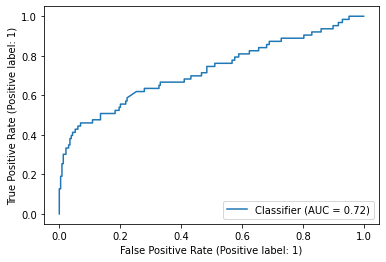

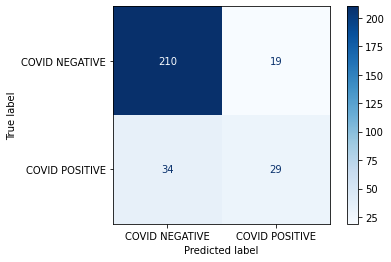

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg16_bn

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.065901,0.802575,0.620968,0.635849,01:04


Better model found at epoch 0 with accuracy value: 0.6209677457809448.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.779013,0.635855,0.673387,0.672859,00:31
1,0.690058,0.596586,0.745968,0.683745,00:30
2,0.613228,0.513337,0.758065,0.728495,00:30
3,0.532284,0.533366,0.770161,0.721093,00:31
4,0.466528,0.654912,0.721774,0.691969,00:31
5,0.386714,0.579421,0.721774,0.714901,00:31
6,0.336430,0.589960,0.778226,0.735220,00:30
7,0.313865,0.570862,0.814516,0.771746,00:30
8,0.257976,0.586045,0.806452,0.801403,00:31
9,0.221616,0.533242,0.818548,0.792598,00:32


Better model found at epoch 0 with accuracy value: 0.6733871102333069.
Better model found at epoch 1 with accuracy value: 0.7459677457809448.
Better model found at epoch 2 with accuracy value: 0.7580645084381104.
Better model found at epoch 3 with accuracy value: 0.7701612710952759.
Better model found at epoch 6 with accuracy value: 0.7782257795333862.
Better model found at epoch 7 with accuracy value: 0.8145161271095276.
Better model found at epoch 9 with accuracy value: 0.8185483813285828.
Better model found at epoch 11 with accuracy value: 0.8266128897666931.
Better model found at epoch 13 with accuracy value: 0.8346773982048035.
Better model found at epoch 19 with accuracy value: 0.8467742204666138.
Better model found at epoch 20 with accuracy value: 0.8629032373428345.


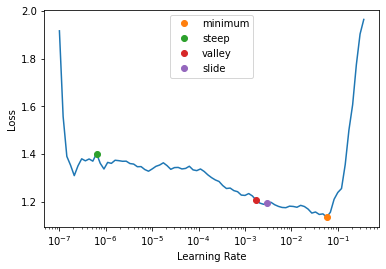

In [ ]:
learn = cnn_learner(dls, vgg16_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

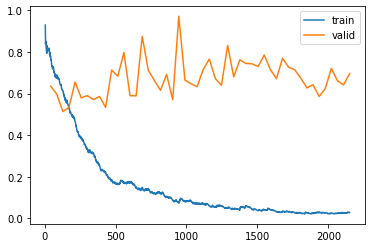

In [ ]:
learn.recorder.plot_loss()

0.8561643835616438 0.7990573230747904 0.7543269230769231 0.7241976848963748 0.7241976848963748 0.8143037605674861
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       229
           1       0.76      0.49      0.60        63

    accuracy                           0.86       292
   macro avg       0.81      0.72      0.75       292
weighted avg       0.85      0.86      0.84       292



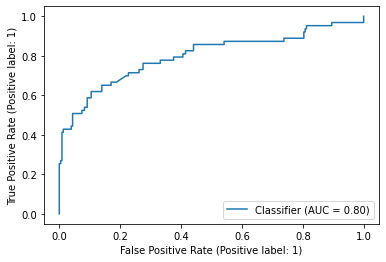

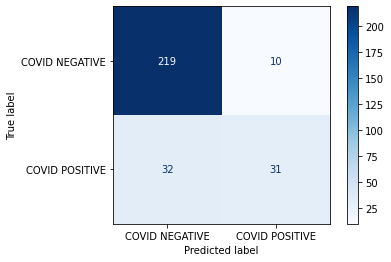

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg19_bn

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.135243,0.820673,0.754032,0.704741,00:29


Better model found at epoch 0 with accuracy value: 0.7540322542190552.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.670398,0.538525,0.770161,0.731640,00:30
1,0.510980,0.460954,0.826613,0.796613,00:30
2,0.382985,0.471335,0.790323,0.805467,00:30
3,0.320439,0.468966,0.838710,0.786551,00:30
4,0.276527,0.540049,0.822581,0.799661,00:30
5,0.244793,0.539088,0.814516,0.761442,00:30
6,0.242158,0.665862,0.802419,0.761635,00:30
7,0.242652,0.687016,0.798387,0.752830,00:30
8,0.247417,0.511439,0.862903,0.811853,00:30
9,0.238765,0.568947,0.790323,0.776101,00:31


Better model found at epoch 0 with accuracy value: 0.7701612710952759.
Better model found at epoch 1 with accuracy value: 0.8266128897666931.
Better model found at epoch 3 with accuracy value: 0.8387096524238586.
Better model found at epoch 8 with accuracy value: 0.8629032373428345.


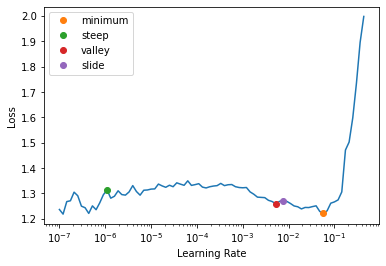

In [ ]:
learn = cnn_learner(dls, vgg19_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

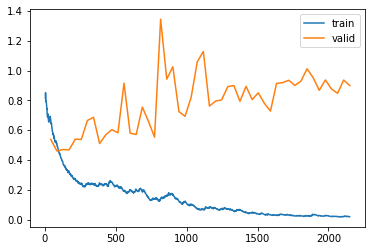

In [ ]:
learn.recorder.plot_loss()

0.821917808219178 0.7605184723088653 0.6811959351641892 0.6563388091772371 0.6563388091772371 0.7507504168982768
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       229
           1       0.66      0.37      0.47        63

    accuracy                           0.82       292
   macro avg       0.75      0.66      0.68       292
weighted avg       0.80      0.82      0.80       292



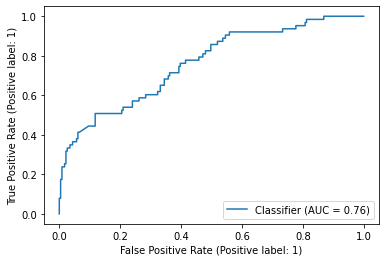

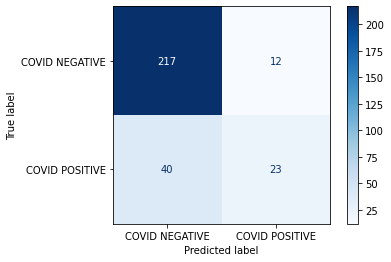

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### squeezenet1_0

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


  0%|          | 0.00/4.79M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.202969,1.333487,0.653226,0.586696,00:28


Better model found at epoch 0 with accuracy value: 0.6532257795333862.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.802566,2.337476,0.705645,0.552975,00:28
1,0.768861,8.213395,0.641129,0.617175,00:28
2,0.731937,0.889217,0.737903,0.595259,00:28
3,0.714668,4.598081,0.741935,0.636526,00:28
4,0.681030,1.317322,0.725806,0.633672,00:28
5,0.668869,2.125456,0.782258,0.688679,00:28
6,0.639575,2.399017,0.649194,0.536623,00:28
7,0.643125,0.713844,0.750000,0.603532,00:28
8,0.652676,0.906610,0.774194,0.618433,00:28
9,0.623465,0.558512,0.705645,0.664393,00:28


Better model found at epoch 0 with accuracy value: 0.7056451439857483.
Better model found at epoch 2 with accuracy value: 0.7379032373428345.
Better model found at epoch 3 with accuracy value: 0.7419354915618896.
Better model found at epoch 5 with accuracy value: 0.7822580933570862.
Better model found at epoch 10 with accuracy value: 0.7903226017951965.
Better model found at epoch 14 with accuracy value: 0.8024193644523621.
Better model found at epoch 26 with accuracy value: 0.8064516186714172.
Better model found at epoch 27 with accuracy value: 0.8104838728904724.


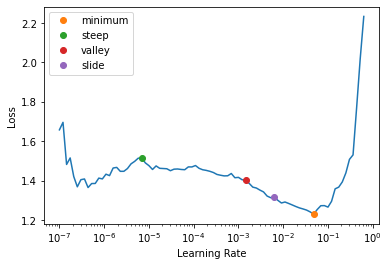

In [ ]:
learn = cnn_learner(dls, squeezenet1_0, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

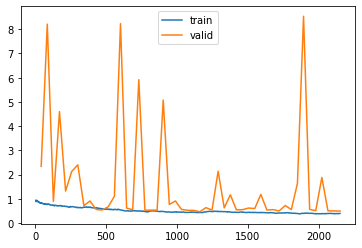

In [ ]:
learn.recorder.plot_loss()

0.791095890410959 0.6961946350592638 0.6348728040505914 0.6194288486864906 0.6194288486864906 0.6785122254455035
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       229
           1       0.53      0.32      0.40        63

    accuracy                           0.79       292
   macro avg       0.68      0.62      0.63       292
weighted avg       0.77      0.79      0.77       292



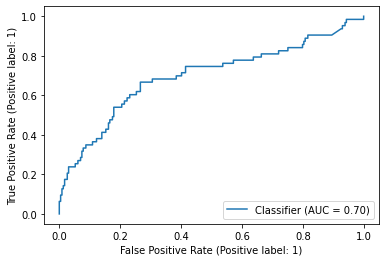

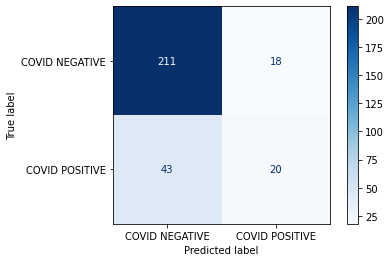

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### densenet121

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.201906,0.820261,0.649194,0.546541,00:32


Better model found at epoch 0 with accuracy value: 0.649193525314331.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.765249,0.586734,0.701613,0.711030,00:32
1,0.609101,0.537957,0.754032,0.717223,00:31
2,0.571360,0.495180,0.782258,0.737542,00:32
3,0.494073,0.497766,0.798387,0.754959,00:32
4,0.461010,0.555771,0.774194,0.736962,00:32
5,0.413647,0.614410,0.798387,0.773246,00:32
6,0.386195,0.571184,0.806452,0.732704,00:31
7,0.343620,0.517794,0.782258,0.786405,00:31
8,0.309643,0.652577,0.798387,0.759603,00:32
9,0.266711,0.552954,0.802419,0.784761,00:32


Better model found at epoch 0 with accuracy value: 0.7016128897666931.
Better model found at epoch 1 with accuracy value: 0.7540322542190552.
Better model found at epoch 2 with accuracy value: 0.7822580933570862.
Better model found at epoch 3 with accuracy value: 0.7983871102333069.
Better model found at epoch 6 with accuracy value: 0.8064516186714172.
Better model found at epoch 15 with accuracy value: 0.8346773982048035.
Better model found at epoch 33 with accuracy value: 0.8427419066429138.
Better model found at epoch 34 with accuracy value: 0.8588709831237793.


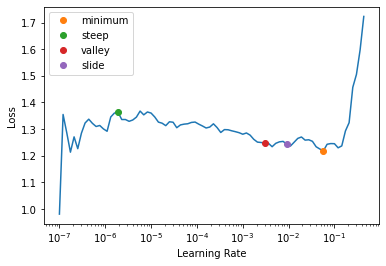

In [ ]:
learn = cnn_learner(dls, densenet121, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

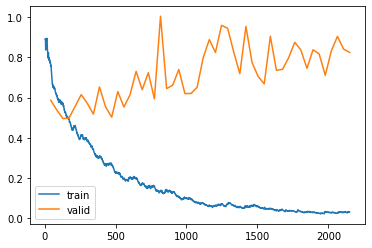

In [ ]:
learn.recorder.plot_loss()

0.821917808219178 0.7839467664795177 0.6862809917355371 0.6620919110002079 0.6620919110002079 0.7478537360890303
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       229
           1       0.65      0.38      0.48        63

    accuracy                           0.82       292
   macro avg       0.75      0.66      0.69       292
weighted avg       0.80      0.82      0.80       292



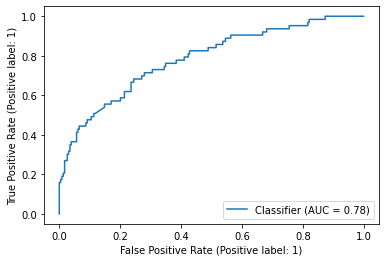

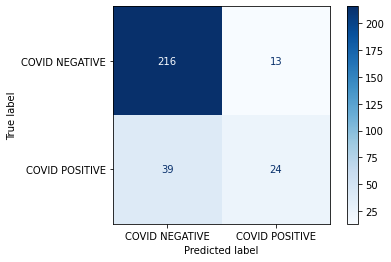

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### xresnet50

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.027819,1.117655,0.633065,0.652395,00:31


Better model found at epoch 0 with accuracy value: 0.6330645084381104.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.617267,0.563212,0.830645,0.688002,00:31
1,0.549669,0.479194,0.826613,0.769182,00:31
2,0.473821,0.494042,0.822581,0.733382,00:32
3,0.431248,0.537969,0.806452,0.746347,00:33
4,0.436104,0.602413,0.770161,0.734543,00:33
5,0.434621,0.550943,0.798387,0.760764,00:33
6,0.402597,0.491007,0.822581,0.751669,00:32
7,0.388740,0.587813,0.826613,0.769666,00:33
8,0.402007,0.718440,0.697581,0.751572,00:32
9,0.407428,0.517197,0.814516,0.753749,00:32


Better model found at epoch 0 with accuracy value: 0.8306451439857483.
Better model found at epoch 12 with accuracy value: 0.8387096524238586.
Better model found at epoch 27 with accuracy value: 0.8427419066429138.
Better model found at epoch 34 with accuracy value: 0.850806474685669.
Better model found at epoch 37 with accuracy value: 0.8548387289047241.


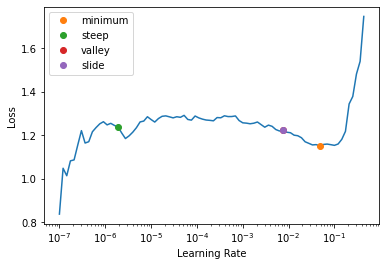

In [ ]:
learn = cnn_learner(dls, xresnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

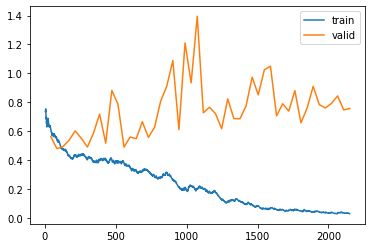

In [ ]:
learn.recorder.plot_loss()

0.8184931506849316 0.7684203230054759 0.7167590914914255 0.7059333194704374 0.7059333194704374 0.7311702458761282
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       229
           1       0.59      0.51      0.55        63

    accuracy                           0.82       292
   macro avg       0.73      0.71      0.72       292
weighted avg       0.81      0.82      0.81       292



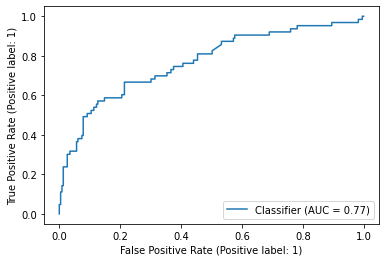

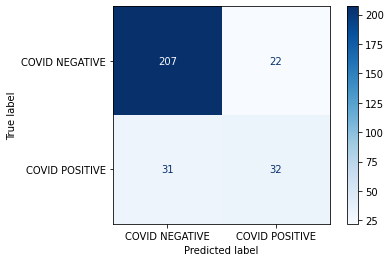

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()